# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns

sns.set()
sns.set_context("notebook")
sns.set_style("whitegrid")

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

        
        
# https://api.openweathermap.org/data/3.0/onecall?lat={lat}&lon={lon}&exclude={part}&appid={API key}

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | neryungri
Processing Record 4 of Set 1 | acarau
Processing Record 5 of Set 1 | chernyshevskiy
Processing Record 6 of Set 1 | marsh harbour
Processing Record 7 of Set 1 | norman wells
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | lompoc
Processing Record 12 of Set 1 | tezu
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | vanimo
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | atambua
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | marzuq
Processing Record 21 of Set 1 | les cayes
Processing Record 22 of Set 1 | wilkie
Processing Record 23 of Set 1 | horsham
Processing Recor

Processing Record 39 of Set 4 | quatre cocos
Processing Record 40 of Set 4 | burica
City not found. Skipping...
Processing Record 41 of Set 4 | ewo
Processing Record 42 of Set 4 | korla
Processing Record 43 of Set 4 | codrington
Processing Record 44 of Set 4 | verkhnedneprovskiy
Processing Record 45 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 46 of Set 4 | manta
Processing Record 47 of Set 4 | treuchtlingen
Processing Record 48 of Set 4 | sisimiut
Processing Record 49 of Set 4 | saint george
Processing Record 0 of Set 5 | hasaki
Processing Record 1 of Set 5 | shchelyayur
City not found. Skipping...
Processing Record 2 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 5 | yerbogachen
Processing Record 4 of Set 5 | porto santo
Processing Record 5 of Set 5 | aiken
Processing Record 6 of Set 5 | eureka
Processing Record 7 of Set 5 | adrar
Processing Record 8 of Set 5 | nikolskoye
Processing Record 9 of Set 5 | nanyamba
Processing Record 10 

Processing Record 29 of Set 8 | yulara
Processing Record 30 of Set 8 | gualeguaychu
Processing Record 31 of Set 8 | srednekolymsk
Processing Record 32 of Set 8 | la ronge
Processing Record 33 of Set 8 | goiatuba
Processing Record 34 of Set 8 | ouesso
Processing Record 35 of Set 8 | great yarmouth
Processing Record 36 of Set 8 | vardo
Processing Record 37 of Set 8 | kizhinga
Processing Record 38 of Set 8 | fort nelson
Processing Record 39 of Set 8 | kailua
Processing Record 40 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 41 of Set 8 | newala
Processing Record 42 of Set 8 | chagda
City not found. Skipping...
Processing Record 43 of Set 8 | coquimbo
Processing Record 44 of Set 8 | ouro preto do oeste
Processing Record 45 of Set 8 | ossora
Processing Record 46 of Set 8 | port lincoln
Processing Record 47 of Set 8 | fayaoue
Processing Record 48 of Set 8 | iquitos
Processing Record 49 of Set 8 | laguna
Processing Record 0 of Set 9 | dicabisagan
Processing Record 1 of Set

Processing Record 14 of Set 12 | isla vista
Processing Record 15 of Set 12 | jiuquan
Processing Record 16 of Set 12 | chara
Processing Record 17 of Set 12 | aitape
Processing Record 18 of Set 12 | hazorasp
Processing Record 19 of Set 12 | zhigansk
Processing Record 20 of Set 12 | pokhara
Processing Record 21 of Set 12 | kasaragod
Processing Record 22 of Set 12 | puerto carreno
Processing Record 23 of Set 12 | otjiwarongo
Processing Record 24 of Set 12 | sao miguel do araguaia
Processing Record 25 of Set 12 | labranzagrande
Processing Record 26 of Set 12 | luoyang
Processing Record 27 of Set 12 | cubara
Processing Record 28 of Set 12 | mehamn
Processing Record 29 of Set 12 | honiara
Processing Record 30 of Set 12 | marawi
Processing Record 31 of Set 12 | harper
Processing Record 32 of Set 12 | kegayli
City not found. Skipping...
Processing Record 33 of Set 12 | boa vista
Processing Record 34 of Set 12 | tulun
Processing Record 35 of Set 12 | ayia galini
Processing Record 36 of Set 12 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,31.59,31,0,3.37,AU,1673244592
1,iqaluit,63.7506,-68.5145,-30.17,67,51,12.96,CA,1673244633
2,neryungri,56.6709,124.6491,-19.19,93,100,1.08,RU,1673244634
3,acarau,-2.8856,-40.1200,25.66,80,96,5.10,BR,1673244634
4,chernyshevskiy,63.0128,112.4714,-40.32,87,62,1.17,RU,1673244634
5,marsh harbour,26.5412,-77.0636,23.43,73,30,4.92,BS,1673244635
6,norman wells,65.2820,-126.8329,-17.98,85,100,1.03,CA,1673244635
7,cape town,-33.9258,18.4232,21.88,77,54,2.24,ZA,1673244635
8,barrow,71.2906,-156.7887,-17.99,78,100,5.66,US,1673244508
9,khatanga,71.9667,102.5000,-48.27,100,78,1.98,RU,1673244628


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,31.59,31,0,3.37,AU,1673244592
1,iqaluit,63.7506,-68.5145,-30.17,67,51,12.96,CA,1673244633
2,neryungri,56.6709,124.6491,-19.19,93,100,1.08,RU,1673244634
3,acarau,-2.8856,-40.1200,25.66,80,96,5.10,BR,1673244634
4,chernyshevskiy,63.0128,112.4714,-40.32,87,62,1.17,RU,1673244634


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

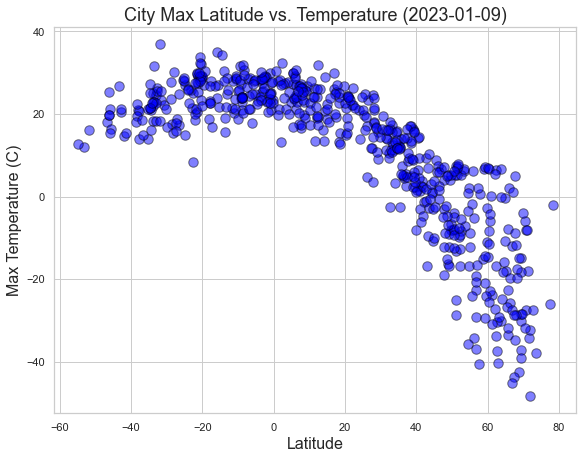

In [8]:
# Build scatter plot for latitude vs. temperature
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Max Temp"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Max Temperature (C)", fontsize=16)
plt.title("City Max Latitude vs. Temperature (2023-01-09)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

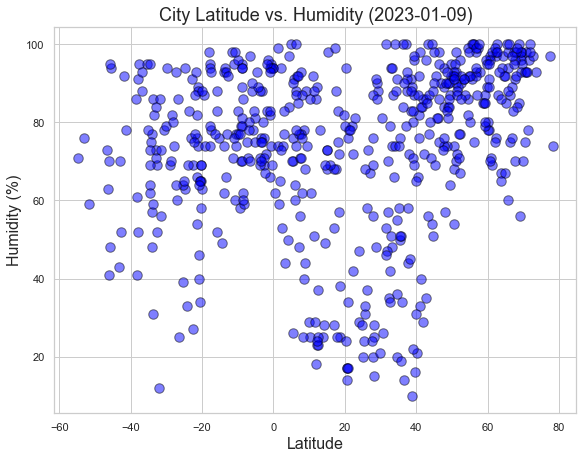

In [9]:
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Humidity"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Humidity (%)", fontsize=16)
plt.title("City Latitude vs. Humidity (2023-01-09)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

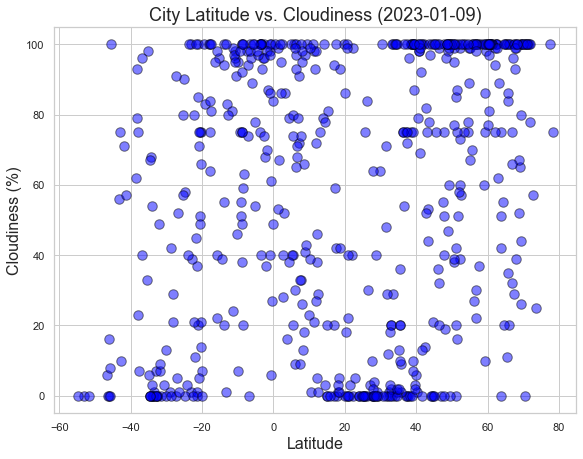

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Cloudiness"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Cloudiness (%)", fontsize=16)
plt.title("City Latitude vs. Cloudiness (2023-01-09)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

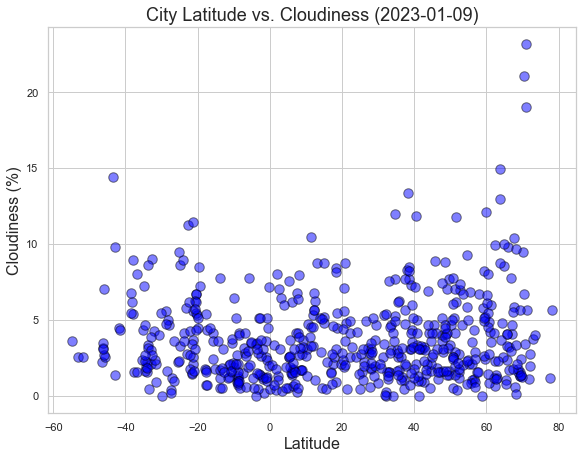

In [11]:
# Build the scatter plots for latitude vs. wind speed
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Wind Speed"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Cloudiness (%)", fontsize=16)
plt.title("City Latitude vs. Cloudiness (2023-01-09)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values, regEQplotX, regEQplotY, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, 90, marker="o", facecolors="blue", alpha=0.5)
    plt.plot(x_values,regress_values,"r-", linewidth=3)
    plt.grid(True)
    print(f'The r-value is {rvalue}')
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=18,color="red")
    plt.xlabel('Latitude', fontsize=16)
    plt.ylabel(f'{ylabel}', fontsize=16)
    plt.grid() 

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float)>= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iqaluit,63.7506,-68.5145,-30.17,67,51,12.96,CA,1673244633
2,neryungri,56.6709,124.6491,-19.19,93,100,1.08,RU,1673244634
4,chernyshevskiy,63.0128,112.4714,-40.32,87,62,1.17,RU,1673244634
5,marsh harbour,26.5412,-77.0636,23.43,73,30,4.92,BS,1673244635
6,norman wells,65.2820,-126.8329,-17.98,85,100,1.03,CA,1673244635


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float)< 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,31.59,31,0,3.37,AU,1673244592
3,acarau,-2.8856,-40.1200,25.66,80,96,5.10,BR,1673244634
7,cape town,-33.9258,18.4232,21.88,77,54,2.24,ZA,1673244635
13,vanimo,-2.6741,141.3028,28.71,69,100,1.37,PG,1673244637
14,castro,-24.7911,-50.0119,14.93,94,58,3.26,BR,1673244637


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8590320461877434


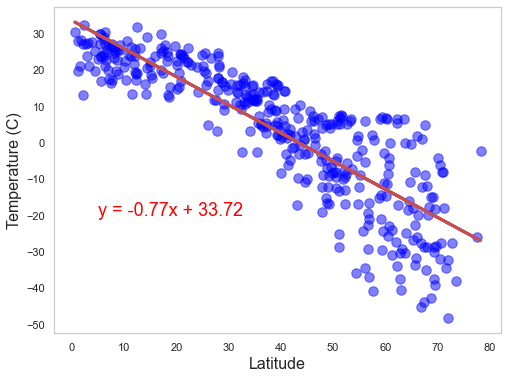

In [15]:
# Linear regression on Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Max Temp"]
linearRegression(x_plot, y_plot, 5, -20, "Temperature (C)")
plt.savefig("output_data/Fig5.png")

The r-value is 0.42609858693275166


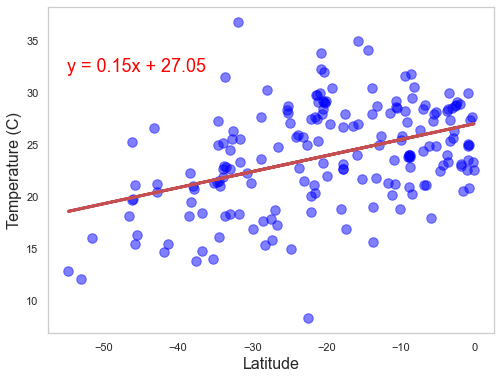

In [16]:
# Linear regression on Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Max Temp"]
linearRegression(x_plot, y_plot, -55, 32, "Temperature (C)")
plt.savefig("output_data/Fig6.png")

**Discussion about the linear relationship:**

The correlation between Temperature and Latitude is stronger in the Northern Hemisphere(R-squared 86%) as opposed to the Southern Hemisphere (R-squared 23%)

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.4257883757174067


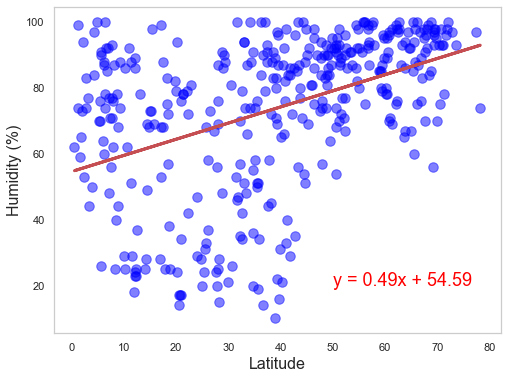

In [17]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Humidity"]
linearRegression(x_plot, y_plot, 50, 20, "Humidity (%)")
plt.savefig("output_data/Fig7.png")

The r-value is 0.27534879842369575


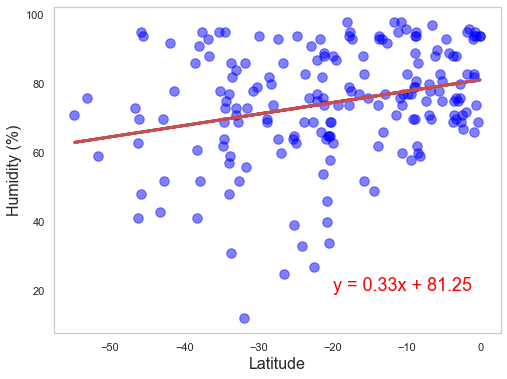

In [18]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Humidity"]
linearRegression(x_plot, y_plot, -20, 20, "Humidity (%)")
plt.savefig("output_data/Fig8.png")

**Discussion about the linear relationship:** 

The correlation between Humidity and Latitude is consistent in both the Northern Hemisphere(R-squared 43%) and the Southern Hemisphere (R-squared 37%)

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.2768633987873256


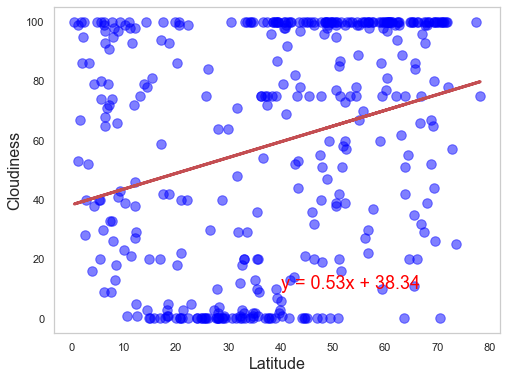

In [19]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Cloudiness"]
linearRegression(x_plot, y_plot, 40, 10, "Cloudiness")
plt.savefig("output_data/Fig9.png")

The r-value is 0.5300586234504621


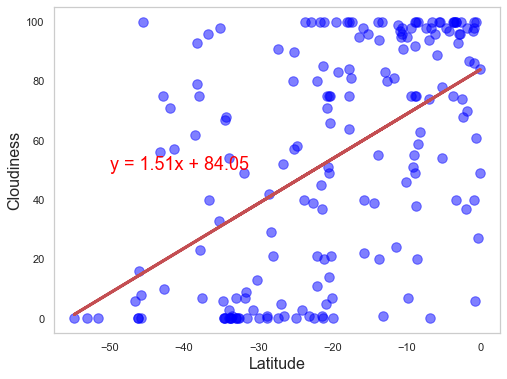

In [20]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Cloudiness"]
linearRegression(x_plot, y_plot, -50, 50, "Cloudiness")
plt.savefig("output_data/Fig10.png")

**Discussion about the linear relationship:**

The relationship between Cloudiness and Latitude is Stochastic.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.16132715932409325


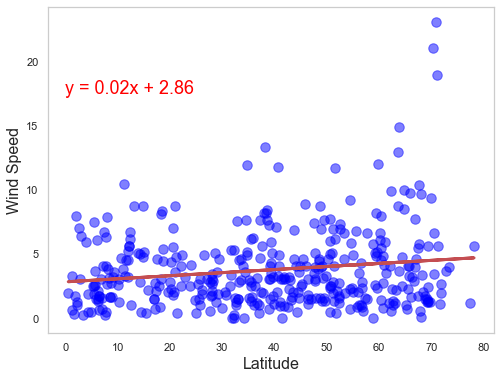

In [21]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Wind Speed"]
linearRegression(x_plot, y_plot, 0, 17.5, "Wind Speed")
plt.savefig("output_data/Fig11.png")

The r-value is -0.26968755522973303


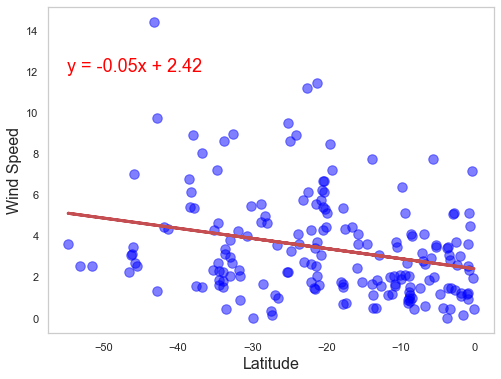

In [24]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Wind Speed"]
linearRegression(x_plot, y_plot, -55, 12, "Wind Speed")
plt.savefig("output_data/Fig12.png")

**Discussion about the linear relationship:** 

The correlation between Wind Speed and Latitude is stronger in the Northern Hemisphere as opposed to the Southern Hemisphere, with both plots indicating that wind speed lowers as we approach the equator.